In [1]:
import pandas as pd
raw_data = pd.read_csv('df_BKI_30k.csv').merge(pd.read_csv('df_target_30k.csv'), on =
'application_id', how='inner')

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\723994541.py:2: DtypeWarning: Columns (40,42,43,44,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('df_BKI_30k.csv').merge(pd.read_csv('df_target_30k.csv'), on =


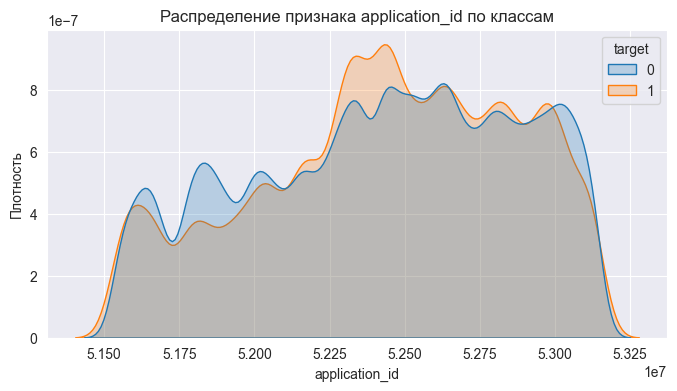

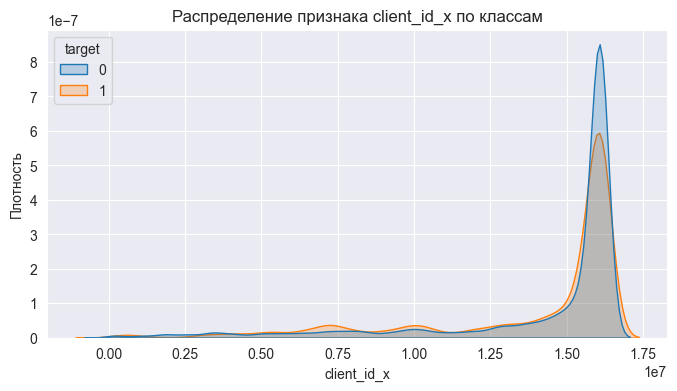

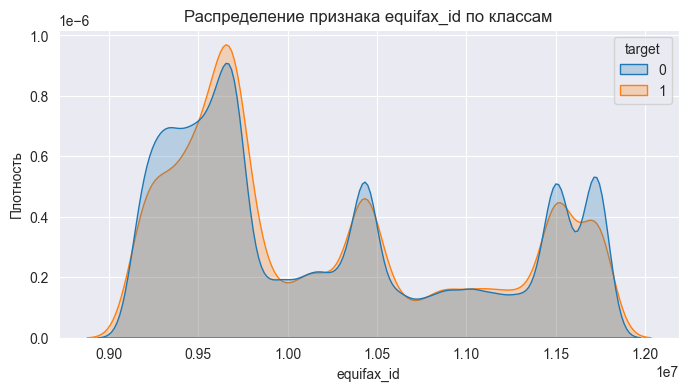

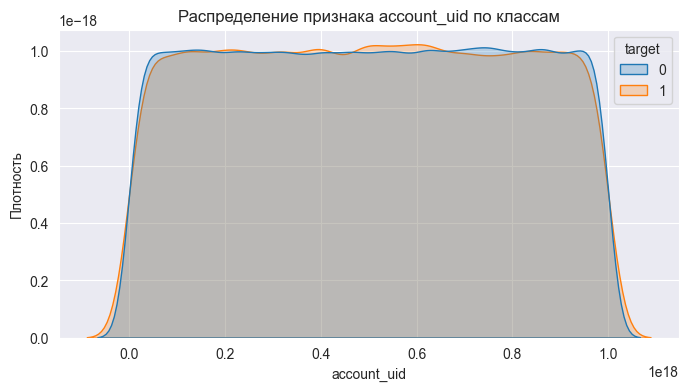

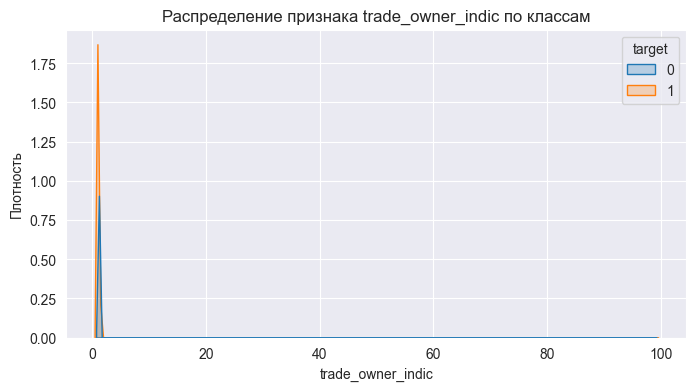

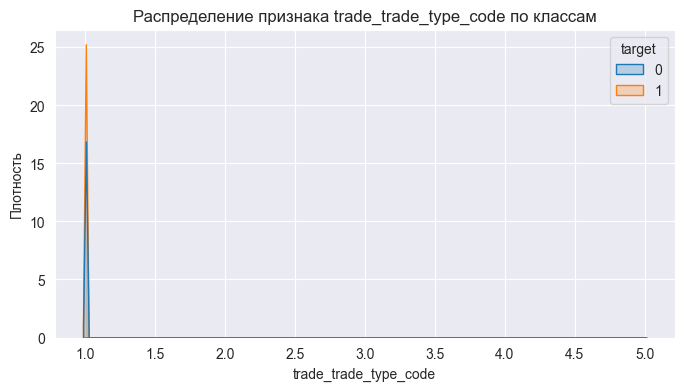

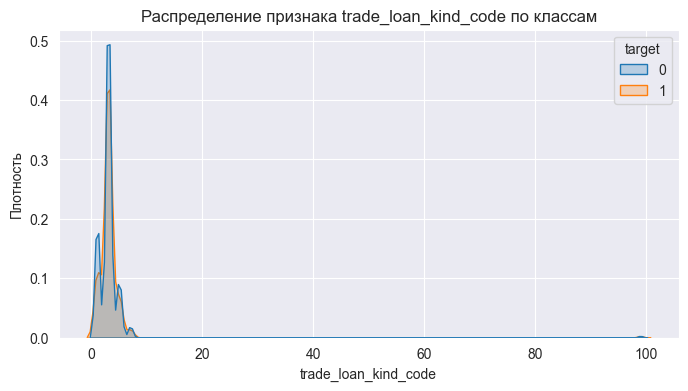

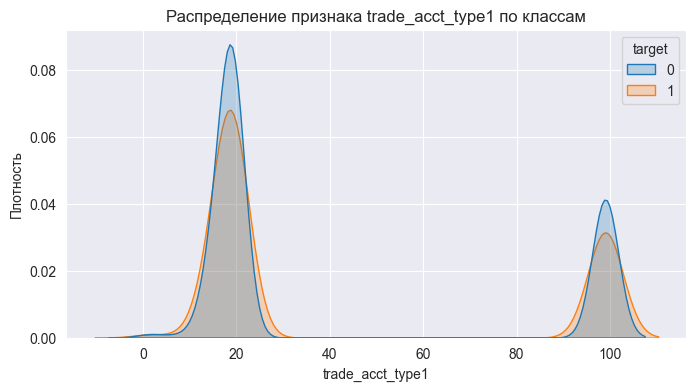

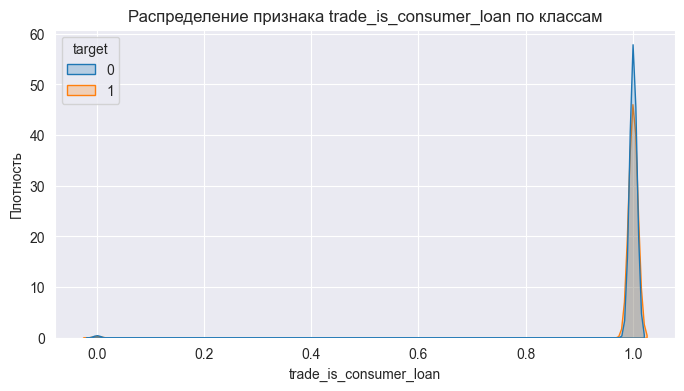

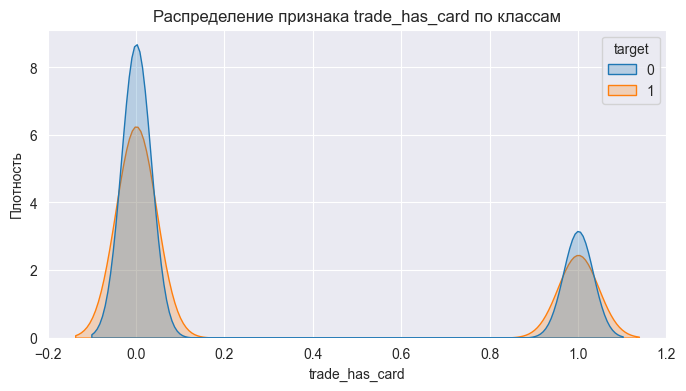

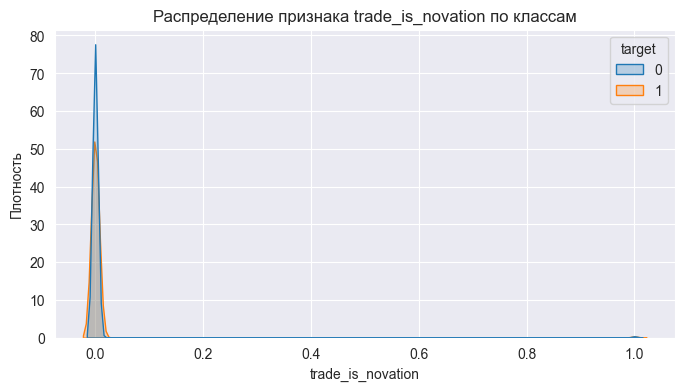

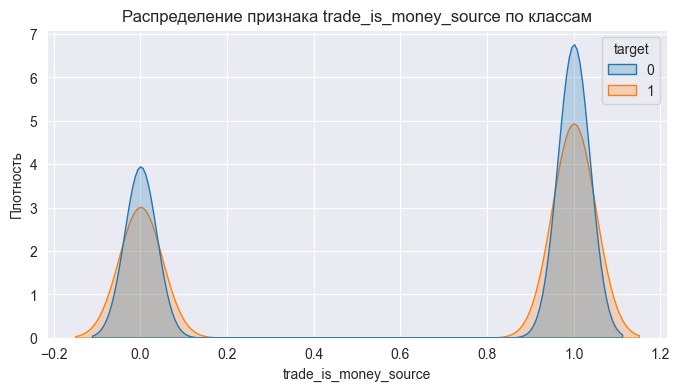

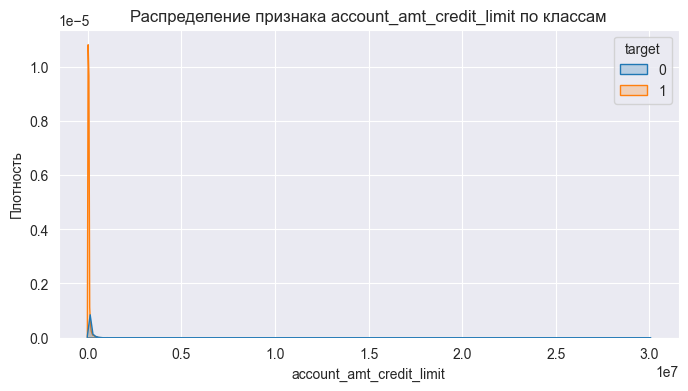

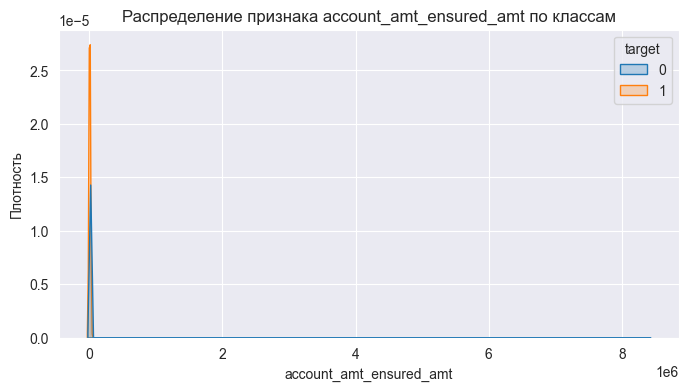

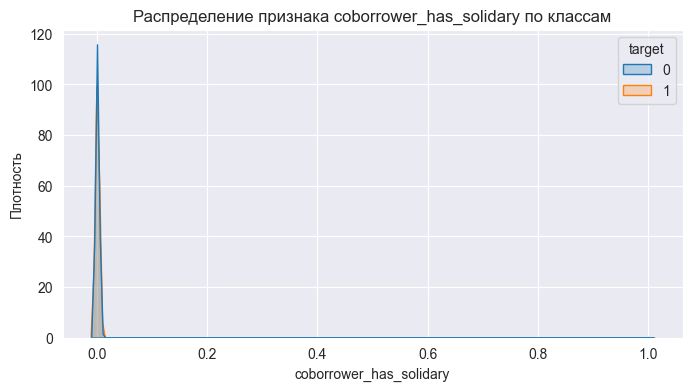

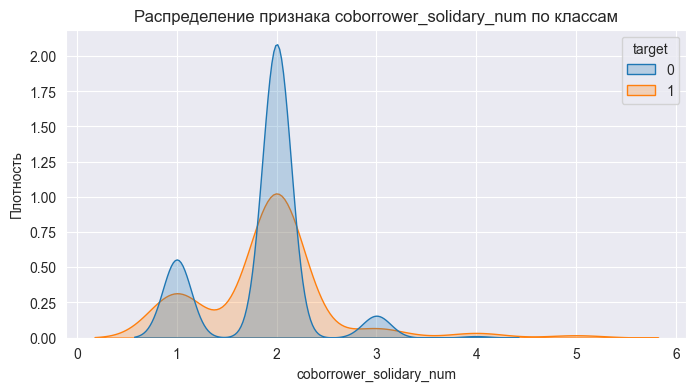

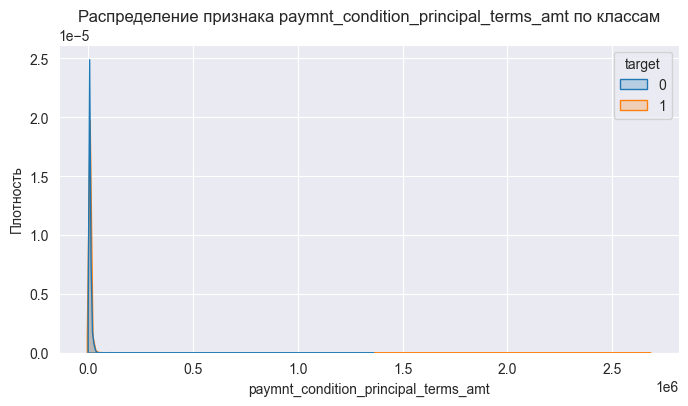

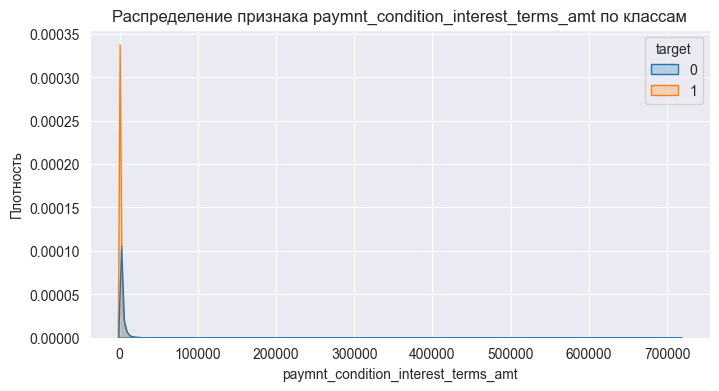

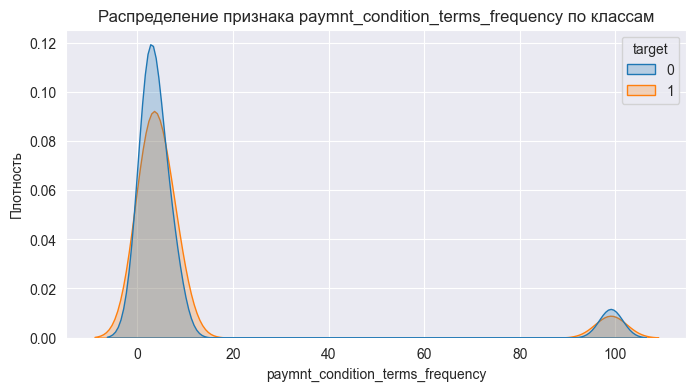

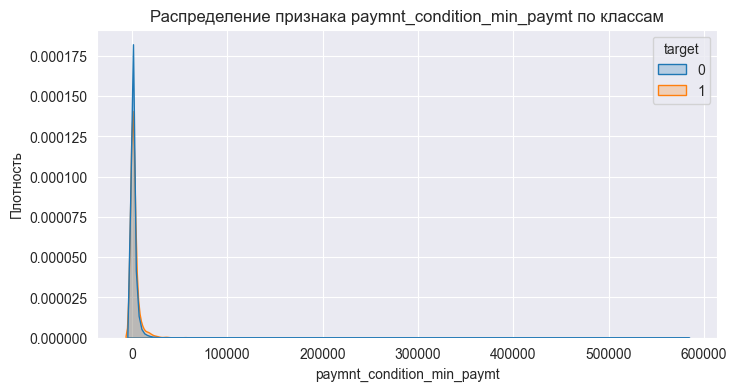

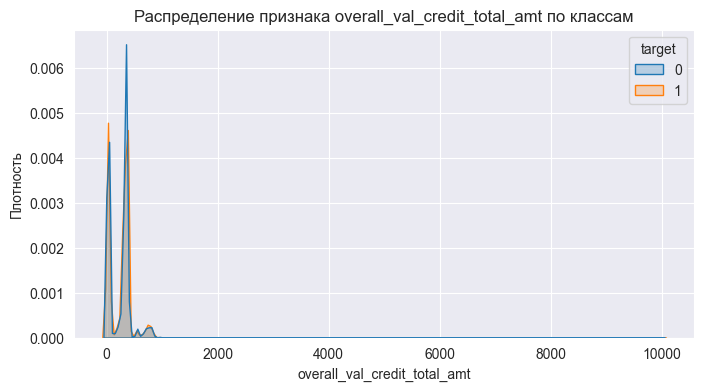

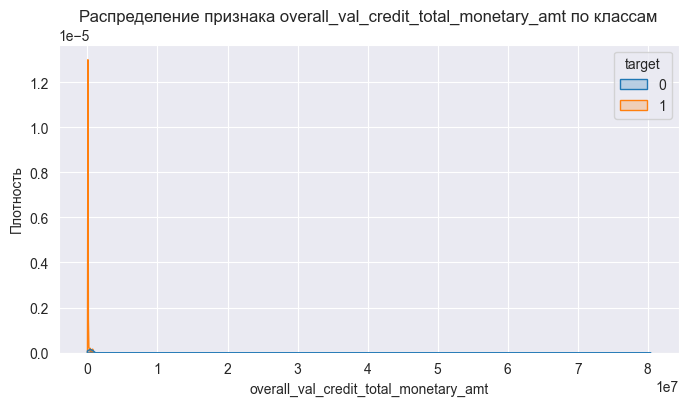

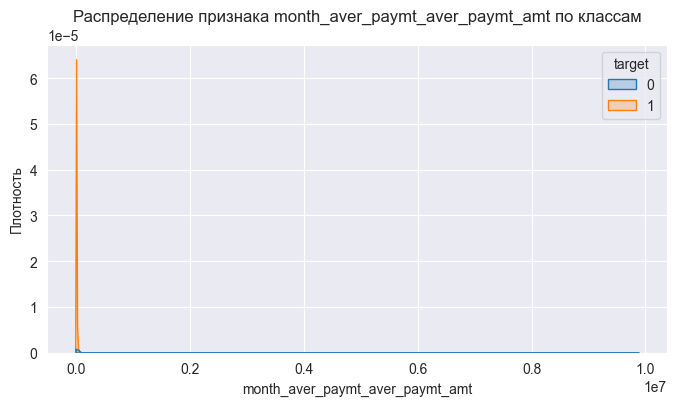

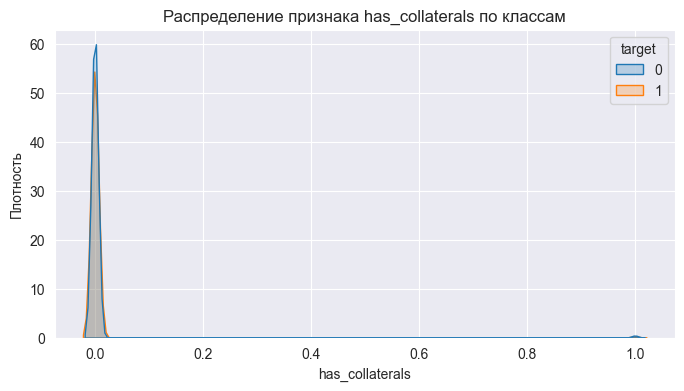

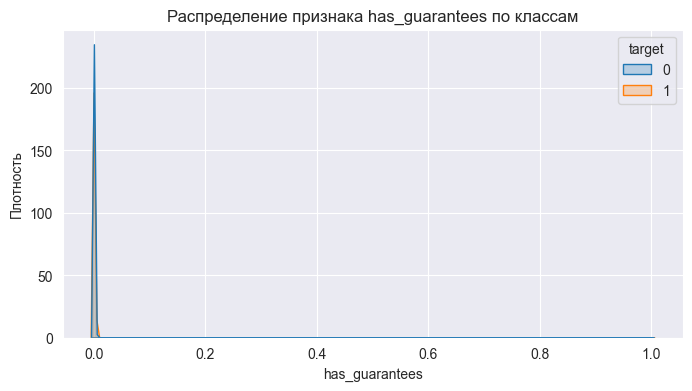

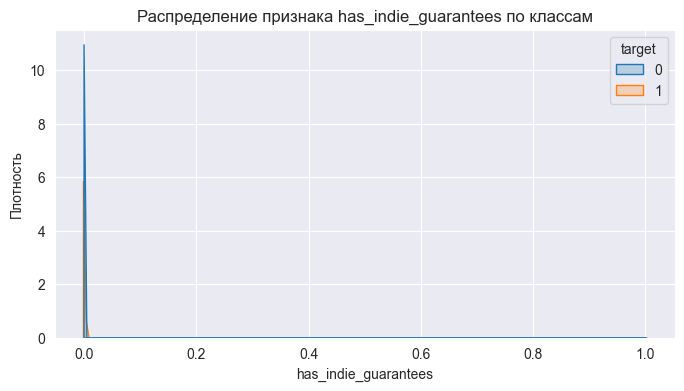

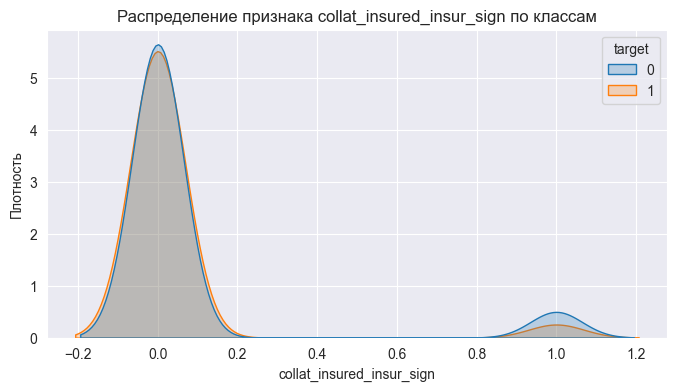

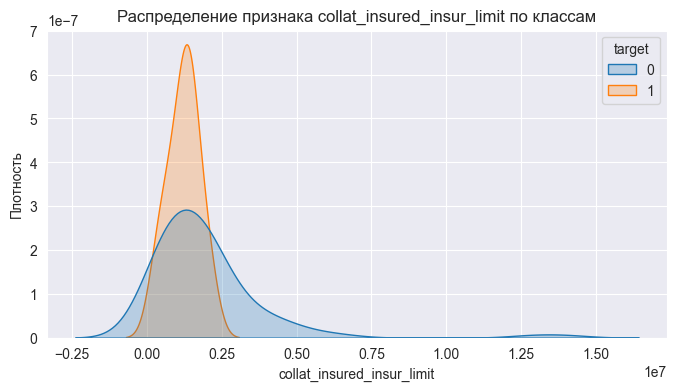

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\1599458252.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,


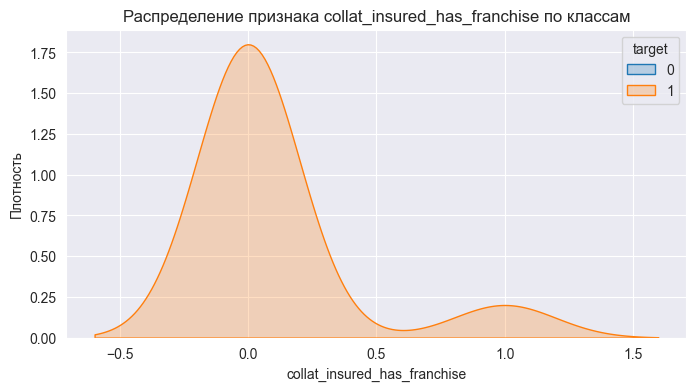

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\1599458252.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,


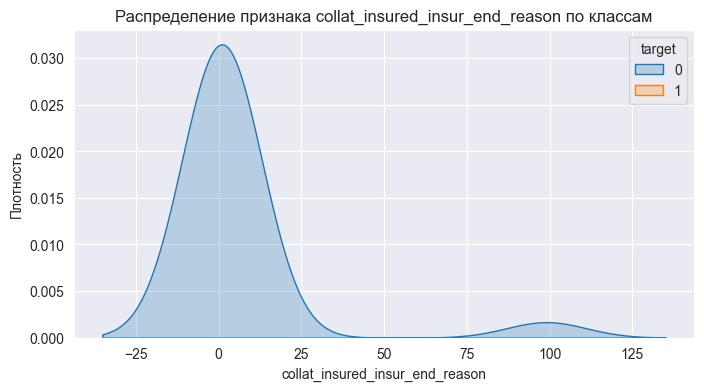

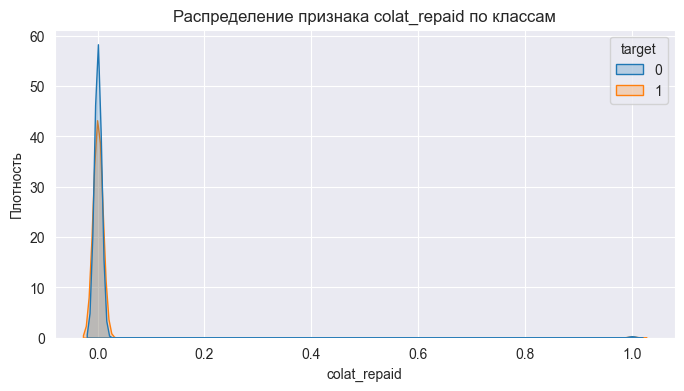

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\1599458252.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,


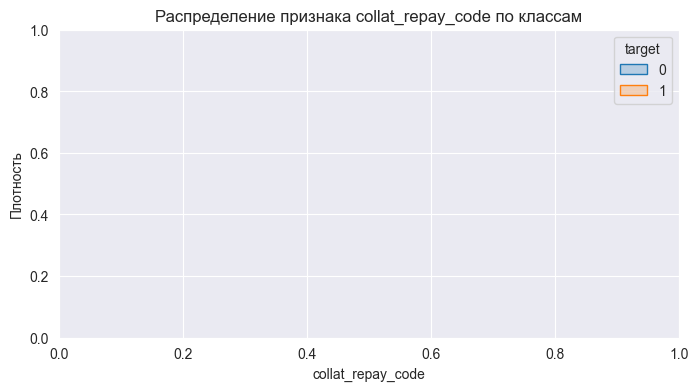

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\1599458252.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,


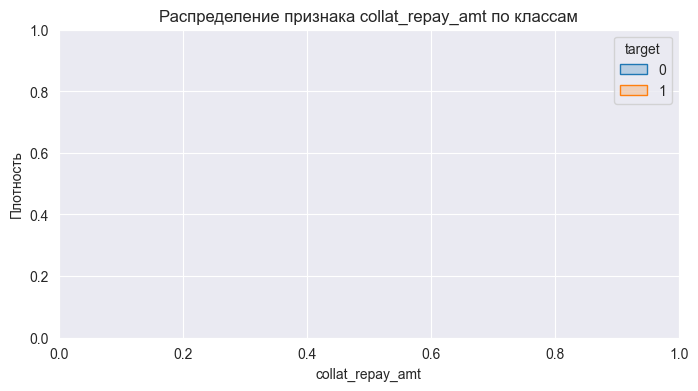

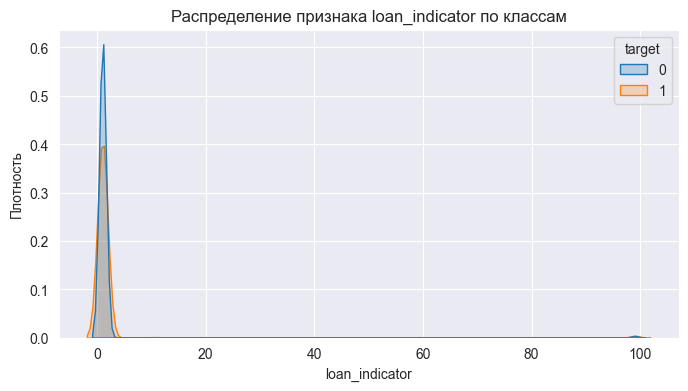

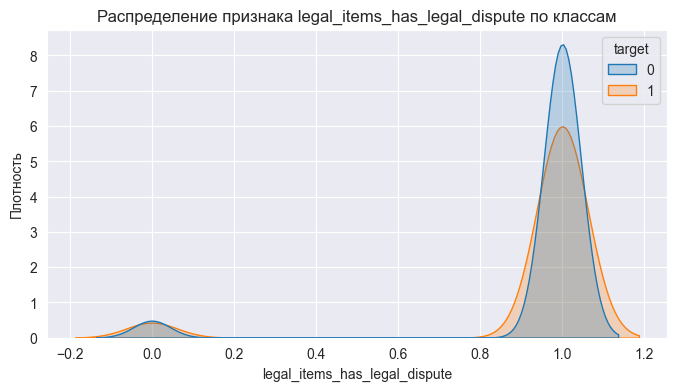

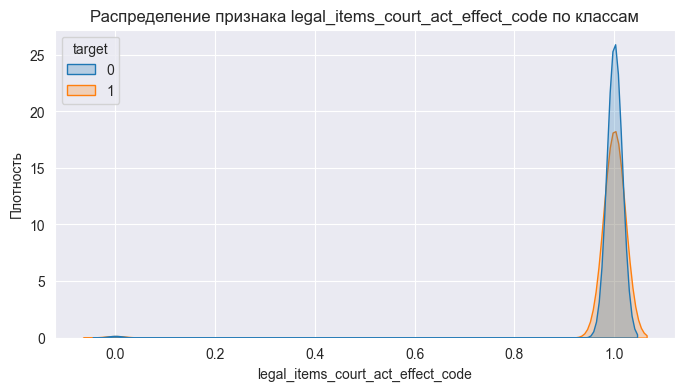

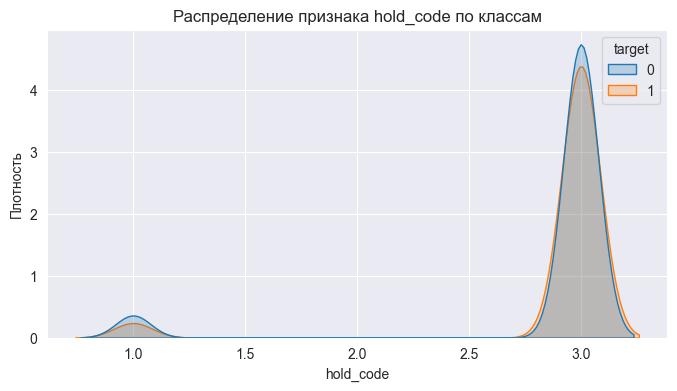

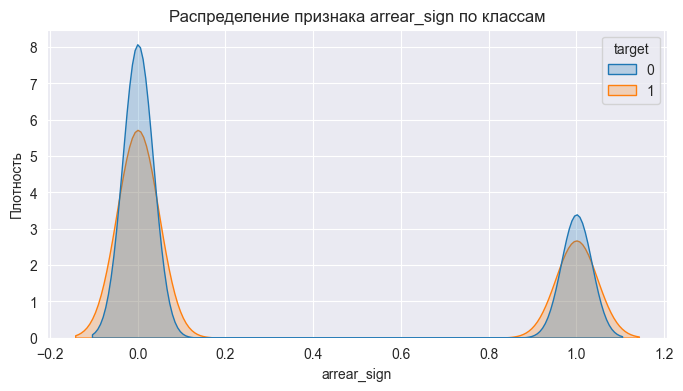

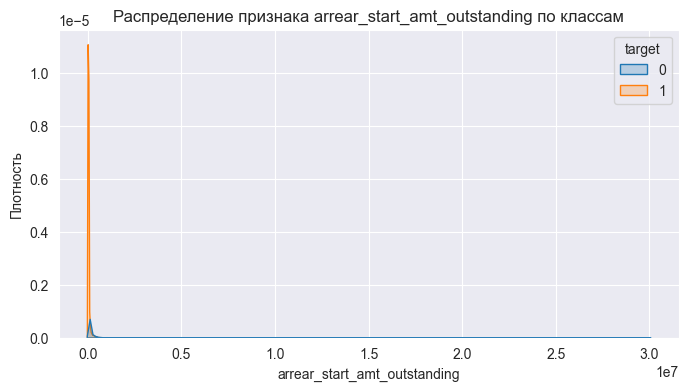

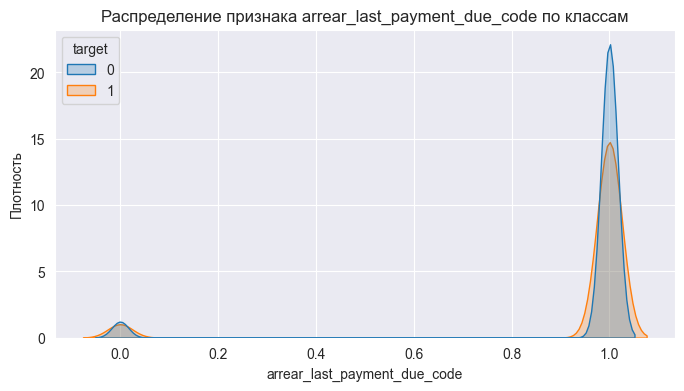

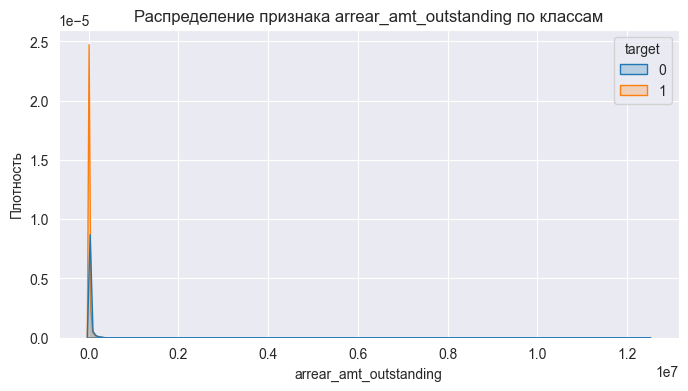

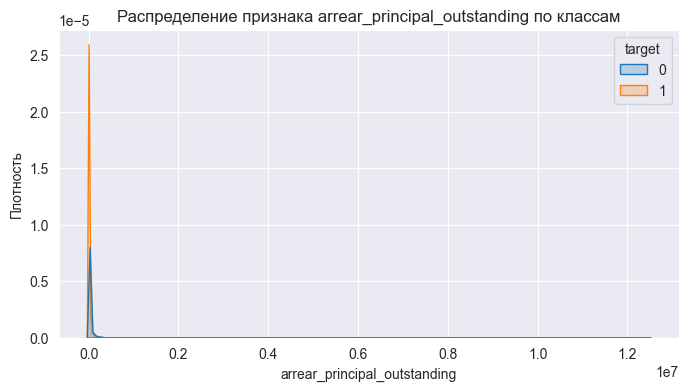

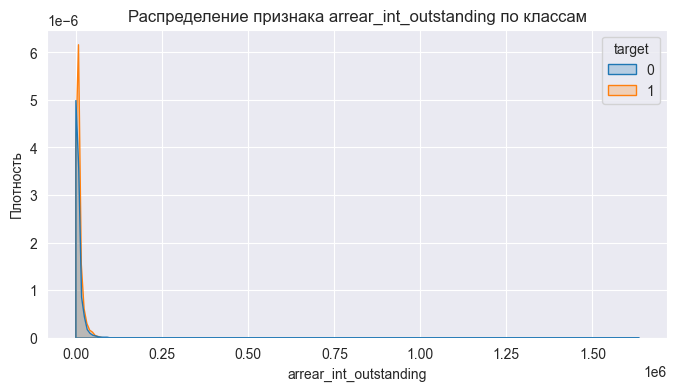

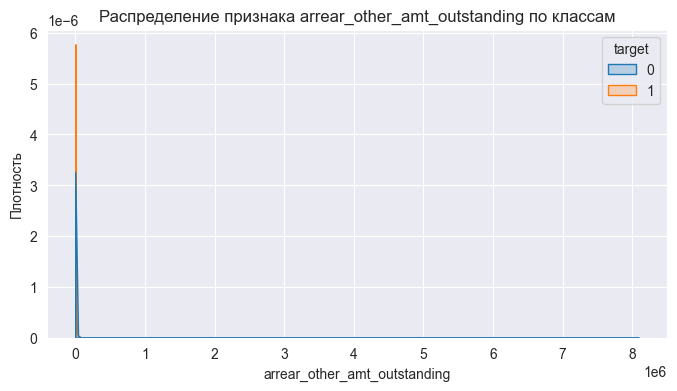

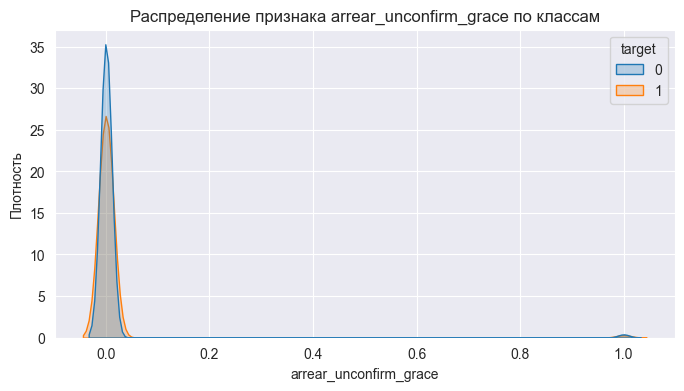

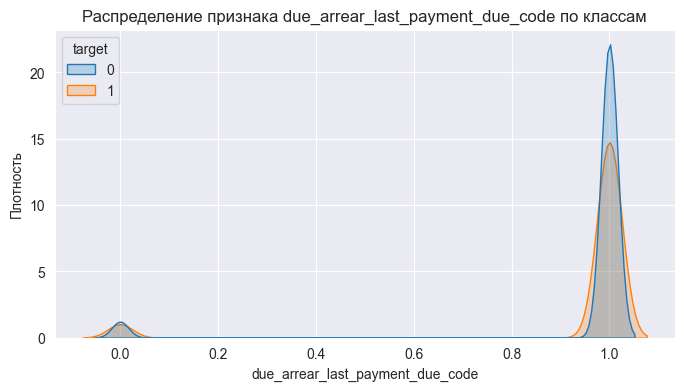

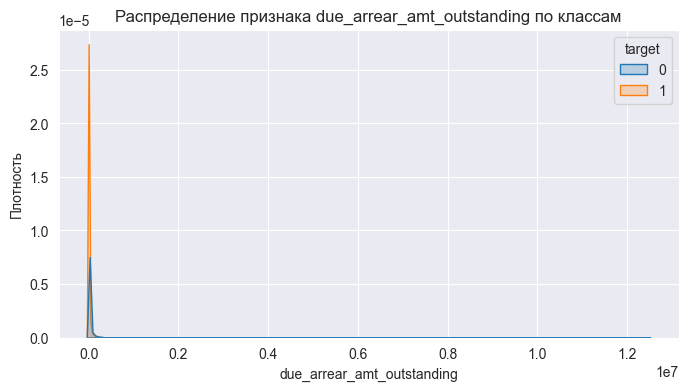

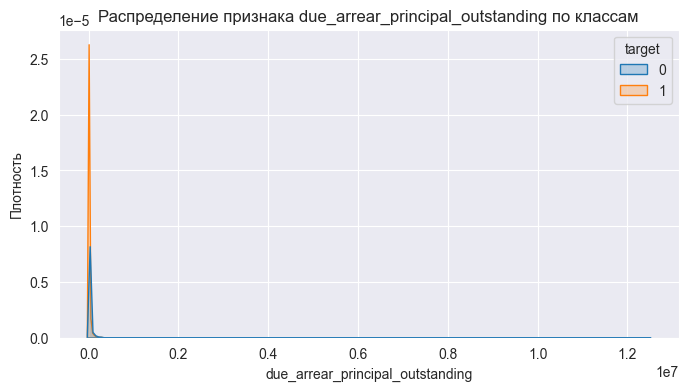

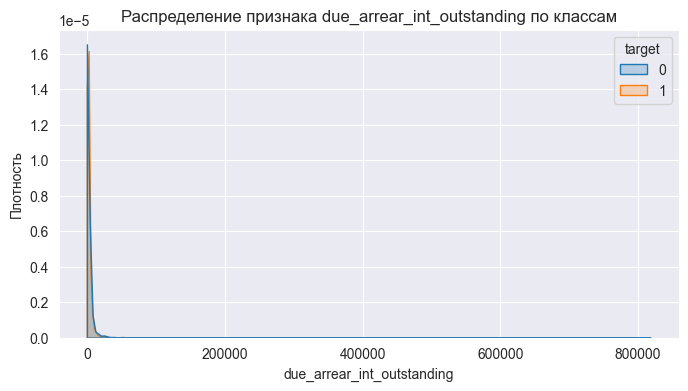

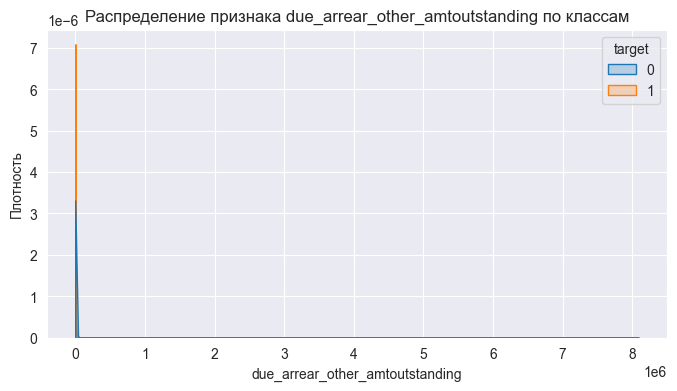

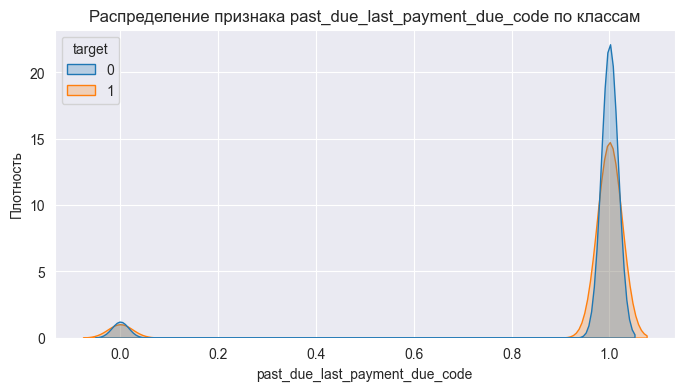

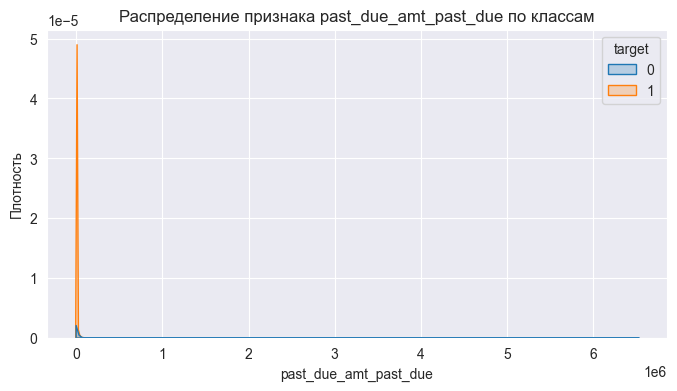

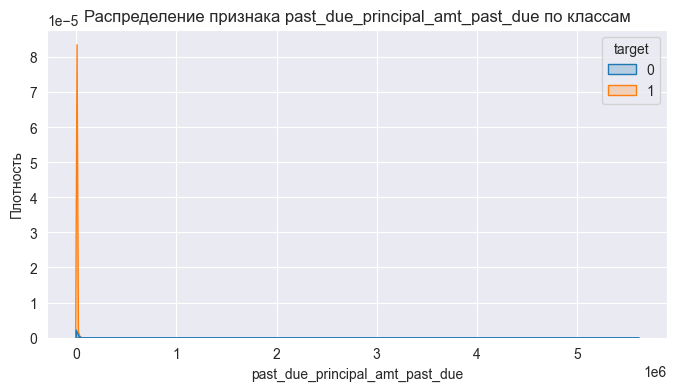

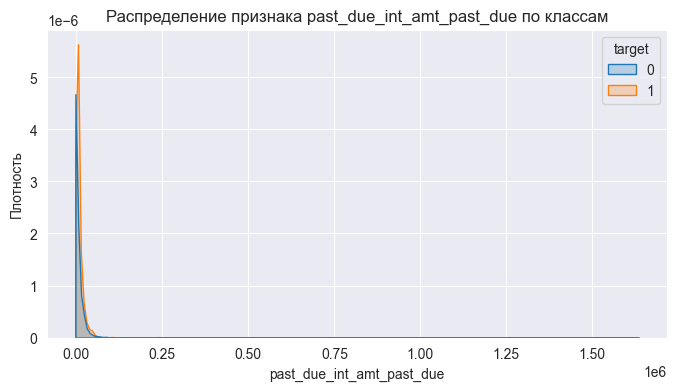

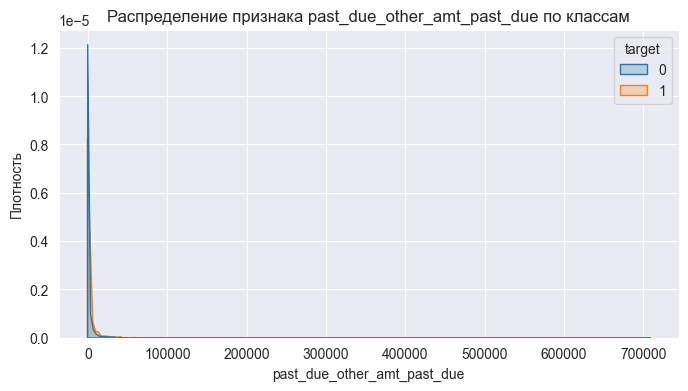

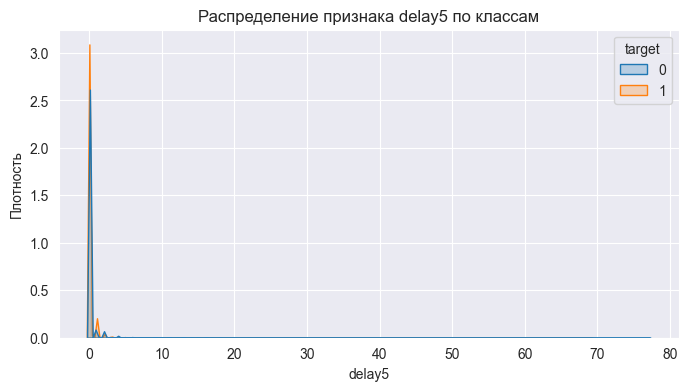

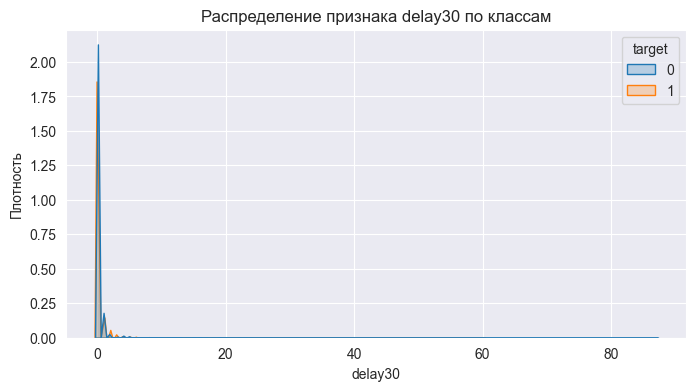

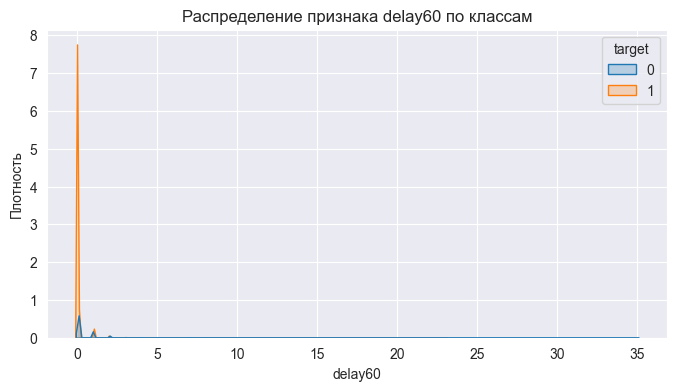

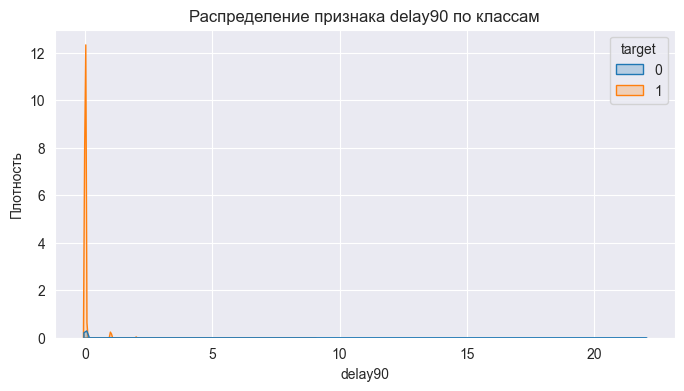

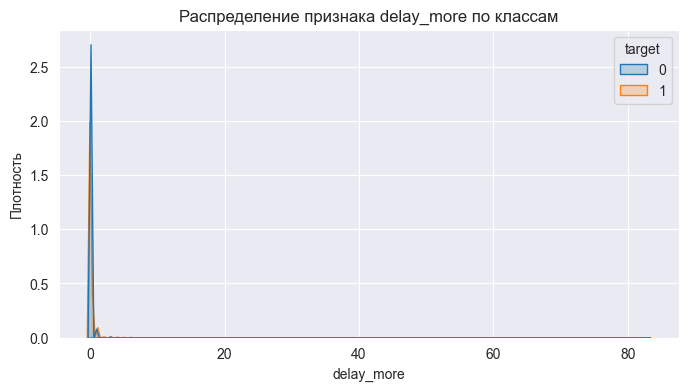

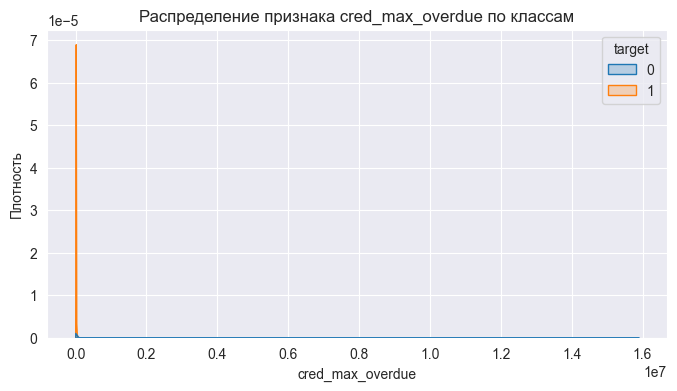

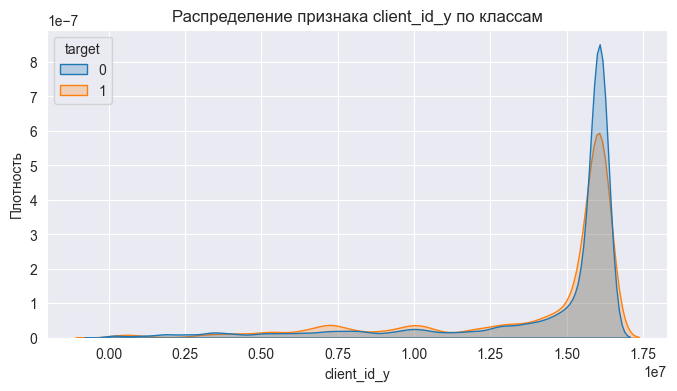

C:\Users\serga\AppData\Local\Temp\ipykernel_20204\1599458252.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,


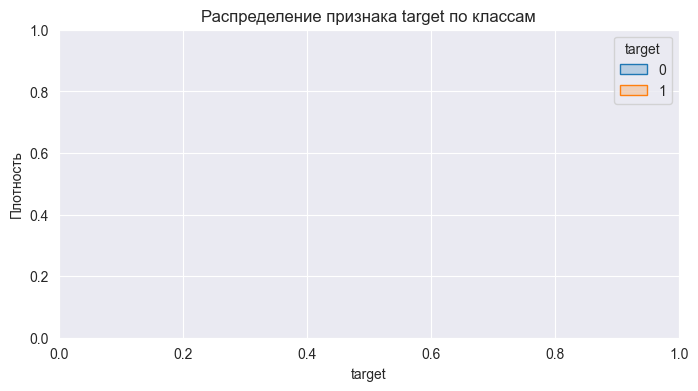

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns


for feature in raw_data.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=raw_data.select_dtypes(include='number'), x=feature, hue=raw_data['target'], common_norm=False,
                fill=True)
    plt.title(f'Распределение признака {feature} по классам')
    plt.xlabel(feature)
    plt.ylabel('Плотность')
    plt.grid(True)
    plt.show()


In [3]:
from catboost import CatBoostClassifier

CatBoostClassifier.get

,application_id,client_id_x,equifax_id,reporting_dt,account_uid,fund_date,trade_owner_indic,trade_opened_dt,trade_trade_type_code,trade_loan_kind_code,...,past_due_int_missed_date,delay5,delay30,delay60,delay90,delay_more,cred_max_overdue,attr_value,client_id_y,target
0,51859026,15984285,9344571,2023-08-01,902086582865039990,2014-07-11,1.0,2014-07-11,1.0,1.0,...,NaN,2,2,0,1,16,113333.27,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,15984285,1
1,51859359,15984353,9344781,2023-08-01,654289381013228862,2015-02-13,1.0,2015-02-13,1.0,1.0,...,NaN,0,1,0,0,13,77541.87,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSAAAAAAAAAAAA...,15984353,1
2,51859359,15984353,9344781,2023-08-01,741680445545450197,2012-03-21,1.0,2012-03-21,1.0,5.0,...,NaN,0,0,0,0,1,101457.30,--543100000AAAAAAAA98765432-------------------...,15984353,1
3,51859863,15984478,9345100,2023-08-01,634072954671362970,2023-05-10,1.0,2023-05-10,1.0,7.0,...,NaN,0,0,0,0,0,0.00,-000,15984478,1
4,51860912,15984719,9345907,2023-08-01,446357239045684673,2022-12-11,1.0,2022-12-11,1.0,5.0,...,NaN,0,2,0,0,0,1195.90,-22020000,15984719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481330,52953097,16216474,11758815,2023-09-17,489511923619133308,2022-11-19,1.0,2022-11-19,1.0,3.0,...,NaN,0,0,0,0,0,0.00,CCCCCCCCCC0,16216474,0
481331,52953097,16216474,11758815,2023-09-17,332254952791259403,2023-04-03,1.0,2023-04-03,1.0,3.0,...,NaN,0,0,0,0,0,0.00,CCCCCC,16216474,0
481332,52953097,16216474,11758815,2023-09-17,89764954048609942,2023-08-15,1.0,2023-08-15,1.0,5.0,...,NaN,0,0,0,0,0,0.00,-0,16216474,0
481333,52953097,16216474,11758815,2023-09-17,646461590573992788,2023-08-21,1.0,2023-08-21,1.0,3.0,...,NaN,0,0,0,0,0,0.00,-0,16216474,0
